# Read the model and my data and predict

## The imports

In [3]:
# from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import PIL

import h5py

print("tf ver:\t\t", tf.__version__)
print("keras ver:\t", keras.__version__)
print("np ver:\t\t", np.__version__)
print("PIL ver:\t", PIL.__version__)
# print("pil ver:\t", Image.__version__)


tf ver:		 2.7.0
keras ver:	 2.7.0
np ver:		 1.17.4
PIL ver:	 7.0.0


---

## Go and read in the images and labels

In [4]:
mydata = np.load('mynumber.npz')

In [5]:
type(mydata)

numpy.lib.npyio.NpzFile

In [6]:
mydata.files

['images', 'labels']

In [7]:
mydata['images'].shape

(12, 28, 28)

In [8]:
mydata['labels'].shape

(12,)

---

## Load my AI model

In [9]:
model = keras.models.load_model('HandWriting_model.h5')

2022-04-12 14:47:38.273899: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-12 14:47:38.273918: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-12 14:47:38.273933: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (6632be3b01a6): /proc/driver/nvidia/version does not exist
2022-04-12 14:47:38.274076: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 102,714
Trainable params: 102,714
Non-trainable params: 0
_________________________________________________________________
None


## Noramlize the data

In [11]:
images = mydata['images'] / 255

---

## Make predictions

In [12]:
all_predictions = model.predict(images)

In [13]:
all_predictions[0]

array([-1.6777   , -2.0704944, -2.0119007, -5.905575 , -1.4167677,
        1.0042564, -1.9358975, -2.3859198,  2.780161 , -7.3938546],
      dtype=float32)

---

## Graph the predictions and images

How do all my prediction look?

In [14]:
def plot_classified_image(ax, img, label, classification):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    predicted = np.argmax(classification)
    if predicted == label:
        color = 'black'
    else:
        color = 'r'

    plt.xlabel("Predicted : {}  Confidence : {:2.0f}  Actual : {}".format(predicted, np.max(classification), label), color=color)
    # plt.xlabel("[zzzzz]")
    return ax

In [15]:
# may need to fix this when we have labels for the category names
def plot_prediction(ax, label, prediction):
    number_of_classes = len(prediction)
    x_values = np.arange(number_of_classes)
    predicted = np.argmax(prediction)
    ax.bar(x_values,prediction, alpha=0.75)
    ax.bar(predicted, prediction[predicted], color='r', label='prediction')
    ax.bar(label,prediction[label], color='g', label='actual')
    ax.set_xticks(x_values)
    ax.set_xlabel('Number')
    ax.set_ylabel('Porbability')
    ax.legend()

In [16]:
def graph_predictions(images, labels, predictions, rows=1, cols=1, start=0, zoom=2):
    n_plots = rows * cols * 2
    fig, ax = plt.subplots(rows,cols * 2,figsize=(cols * 2 * zoom, rows * zoom))
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    for n in range(n_plots):
        #plt.subplot(rows, cols * 2, n+1)
        img_index = (n // 2) + start
        if((n%2)==0):
            plot_classified_image(plt.subplot(rows, cols * 2, n+1), images[img_index], labels[img_index], predictions[img_index])
        else:
            plot_prediction(plt.subplot(rows, cols * 2, n+1), labels[img_index], predictions[img_index])
    plt.show()

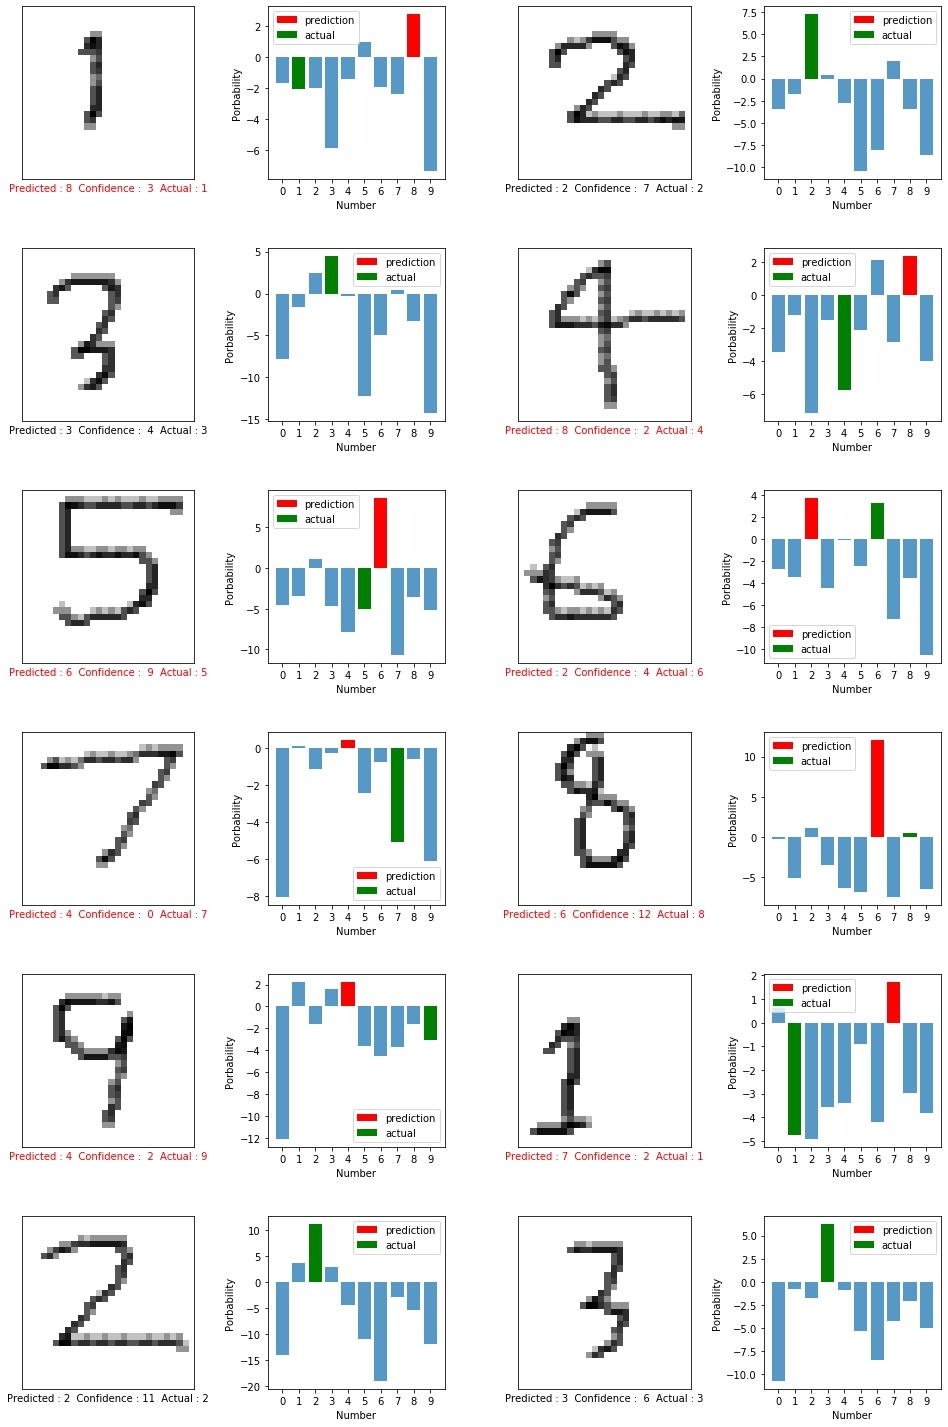

In [22]:
graph_predictions(images, mydata['labels'], all_predictions, start=0, rows=6, cols=2, zoom=4)